In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

In [6]:
data_train = pd.read_csv("C:\\Users\\aa\\Desktop\\project\\models  to find the best k for MFCC\\100\\data set\\spliting data\\train part_1.csv")
data_test= pd.read_csv("C:\\Users\\aa\\Desktop\\project\\models  to find the best k for MFCC\\100\\data set\\spliting data\\all_test.csv")
data_val= pd.read_csv("C:\\Users\\aa\\Desktop\\project\\models  to find the best k for MFCC\\100\\data set\\spliting data\\all_val.csv")

data_train = data_train.sample(frac=1).reset_index(drop=True)
data_test = data_test.sample(frac=1).reset_index(drop=True)
data_val = data_val.sample(frac=1).reset_index(drop=True)


In [ ]:
data_train

,label,0,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,24
0,fake,-339.629150,33.426197,-24.986858,-11.543664,-40.209496,-29.495903,-25.445843,-11.548045,-9.307381,...,-10.067195,-11.941667,-5.254249,-3.017964,-1.007223,-3.078301,0.597710,0.070073,-0.265208,-1.933602
1,fake,-319.419373,51.735954,-19.077978,-17.065773,-24.657932,-39.662643,-24.054327,-4.671831,-10.827663,...,-12.542295,-6.948917,-7.970725,4.640985,-3.939916,-3.161133,1.566275,-3.868115,1.010226,-3.614965
2,real,-268.853394,30.573032,6.371891,-21.329407,-42.370247,-29.076294,-21.606112,-10.509542,-18.399555,...,-10.195271,-6.123636,-7.073922,-1.411707,-1.528331,-8.245215,0.323183,-9.266010,-0.639158,-3.545411
3,fake,-304.324219,32.129124,-4.131433,-19.861813,-40.462250,-34.659317,-18.964725,-12.240536,-16.809347,...,-15.823633,-8.754762,-6.858462,-1.742731,-1.859577,-3.783768,0.007289,-0.055855,1.995444,-2.498173
4,fake,-314.367645,40.761478,-30.271608,-7.104614,-28.551954,-34.695549,-33.155357,-15.428659,-6.428828,...,-10.017328,-10.316067,-3.339150,-1.610210,-1.255994,-3.015620,0.654009,-1.280066,-3.409714,-4.859892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23573,fake,-327.862366,33.021744,-12.553768,-5.746955,-34.457352,-40.133869,-31.043324,-13.876286,-14.400770,...,-12.886993,-10.121803,-5.357605,-0.982484,0.444167,-4.267247,-0.585002,-1.361323,-1.665274,-3.059062
23574,fake,-343.625183,35.237015,-25.320177,-20.123672,-28.485781,-22.589201,-25.395649,-13.987080,-12.827536,...,-5.850682,-7.078003,-3.455233,0.936173,-0.070555,0.581735,0.177017,-0.650389,-1.999946,-3.514514
23575,fake,-337.161957,55.961853,-27.486139,-28.168285,-29.353735,-31.868765,-26.529058,-7.016884,-10.943954,...,-10.571682,-11.078383,-3.953082,-2.377867,-1.493168,-5.663102,-0.692253,-0.654671,-2.875016,-5.403285
23576,fake,-325.124512,20.303085,5.952712,1.619602,-33.171028,-39.884888,-26.619648,-10.796324,-20.688593,...,-13.280644,-9.210875,-5.780653,-2.699300,-1.546976,-2.891840,0.917279,-2.127636,0.563848,-2.281638


# Encoding

In [7]:
def encodeing(row):
    if row == "real":
      row = 0
    else :
      row =1
    return row

      

In [8]:
# data_train['label'] = data_train['label'].apply(encodeing)
# data_test['label']=data_test['label'].apply(encodeing)
# data_val['label']=data_test['label'].apply(encodeing)

In [9]:
data_train

,label,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,fake,-306.921326,53.293018,-20.000957,-18.536442,-39.781185,-41.742313,-11.678054,-15.916217,-21.128649,...,14.356652,10.873713,5.455611,-0.690923,-7.137050,-11.879164,-15.684088,-16.689177,-15.551497,-11.957931
1,fake,-295.222626,15.905941,-11.051978,-8.489007,-32.817947,-36.271439,-32.141216,-17.880743,-7.306180,...,14.801456,11.219444,5.581073,-0.753719,-7.389214,-11.769518,-15.363281,-15.784241,-14.465268,-10.992316
2,fake,-333.773712,35.047989,-7.400196,1.719531,-29.585438,-40.182434,-33.450871,-16.010681,-5.215246,...,14.811807,10.991402,6.022015,0.249178,-6.143223,-10.911807,-14.934133,-16.364513,-15.320057,-12.252742
3,real,-292.607086,48.621441,-18.748705,-19.487453,-32.893837,-45.398151,-14.658494,-9.698881,-13.464665,...,11.309923,8.127817,4.246242,-0.639600,-6.185764,-9.911580,-13.201906,-14.391807,-13.149723,-10.924856
4,fake,-300.126740,52.865116,-24.902576,-16.426813,-34.236401,-36.210262,-19.713276,-15.977428,-22.446465,...,17.461840,13.359921,7.280792,0.421666,-6.751625,-12.065166,-16.352354,-18.116280,-17.034233,-13.332744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23573,fake,-323.529419,38.279514,-21.946743,-10.548436,-30.520790,-33.499935,-27.451799,-15.834465,-14.970769,...,12.869824,9.741581,4.752447,-0.615290,-6.346680,-10.585777,-13.947864,-15.339695,-14.294649,-11.246168
23574,fake,-329.762177,23.258545,-12.816452,-2.256179,-32.878380,-39.339443,-20.564766,-12.871362,-14.920319,...,12.806604,9.798581,5.381313,-0.118667,-6.172780,-10.198330,-13.676166,-14.688250,-13.517242,-10.452005
23575,fake,-318.145081,42.813023,-19.816994,-13.348760,-35.391754,-29.501425,-25.937056,-15.110918,-11.675799,...,13.497179,10.152555,5.446080,-0.238856,-6.510794,-10.669806,-14.628755,-16.067312,-14.473582,-11.347633
23576,fake,-299.631714,33.811596,-8.714211,-10.563033,-36.345688,-40.380173,-18.403269,-9.711888,-18.409101,...,15.003922,11.607625,6.426334,0.225854,-6.283480,-10.794408,-14.877819,-16.223495,-15.126494,-12.312386


In [10]:
count = data_train['label'].value_counts()
print(count)


fake    21482
real     2096
Name: label, dtype: int64


In [11]:
# Assuming 'data' is your DataFrame
X_train = data_train.drop(columns='label').values  # Features
y_train = np.array(data_train['label'].values)  # Labels

# # Encode the labels using LabelEncoder (if not already done)
# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(y)
# num_classes = len(label_encoder.classes_)

# # Split the data into training, validation, and test sets
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_val = data_val.drop(columns='label').values  # Features
y_val = np.array(data_val['label'].values)  # Labels

X_test = data_test.drop(columns='label').values  # Features
y_test = np.array(data_test['label'].values)  # Labels


In [12]:
import pandas as pd
y_train = pd.get_dummies(y_train)
y_val=pd.get_dummies(y_val)
y_test=pd.get_dummies(y_test)

In [13]:
y_train

,fake,real
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0
...,...,...
23573,1,0
23574,1,0
23575,1,0
23576,1,0


In [14]:
# Reshape the data to match the LSTM input shape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

from keras.layers import Conv1D, MaxPooling1D, Flatten

import tensorflow as tf
# gpus = tf.config.list_physical_devices('GPU')
# tf.config.set_visible_devices(gpus[0], 'GPU')
# logical_gpus = tf.config.list_logical_devices('GPU')
# print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")

model = Sequential()

# Add a 1D convolutional layer
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))

# Add a max-pooling layer
model.add(MaxPooling1D(pool_size=2))

# Flatten the output
model.add(Flatten())

# Add a fully connected layer
model.add(Dense(64, activation='relu'))

# Add the output layer with softmax activation
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 98, 64)            256       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 49, 64)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 64)                200768    
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 201,154
Trainable params: 201,154
Non-trainable params: 0
__________________________________________________

In [15]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

461/461 - 2s - loss: 0.0899 - accuracy: 0.9695 - 2s/epoch - 5ms/step
Test Accuracy: 96.95%


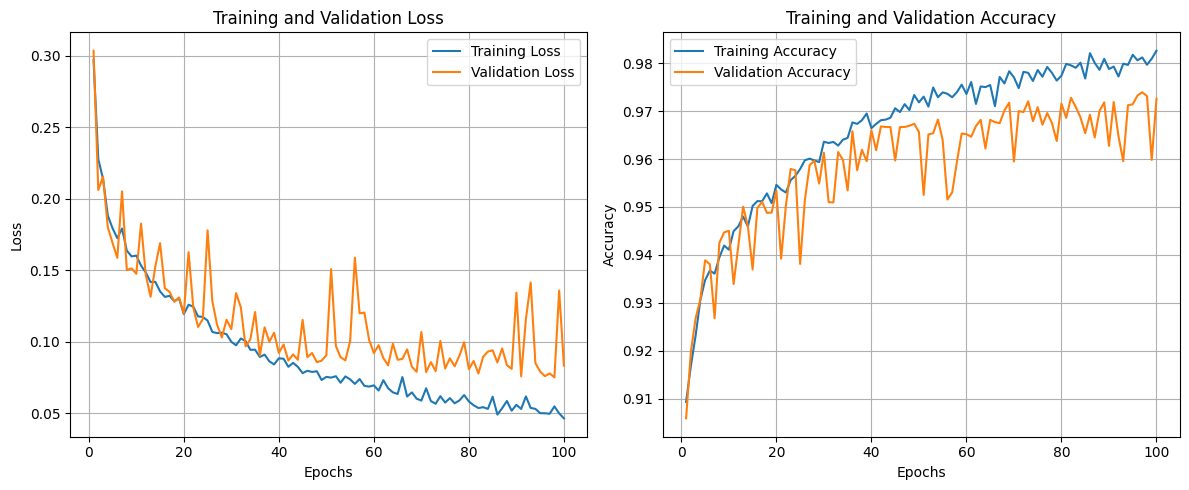

In [16]:
import matplotlib.pyplot as plt

# Get the training and validation loss and accuracy from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a range of values for the x-axis (epochs)
epochs = range(1, len(train_loss) + 1)

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 5))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


In [17]:
# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


461/461 [==============================] - 1s 2ms/step


In [18]:
y_test

,fake,real
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
14731,0,1
14732,1,0
14733,1,0
14734,1,0


In [19]:
y_ture=np.argmax(y_test.values, axis=1)


In [20]:
y_ture

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

Test f1_score : 82.50%


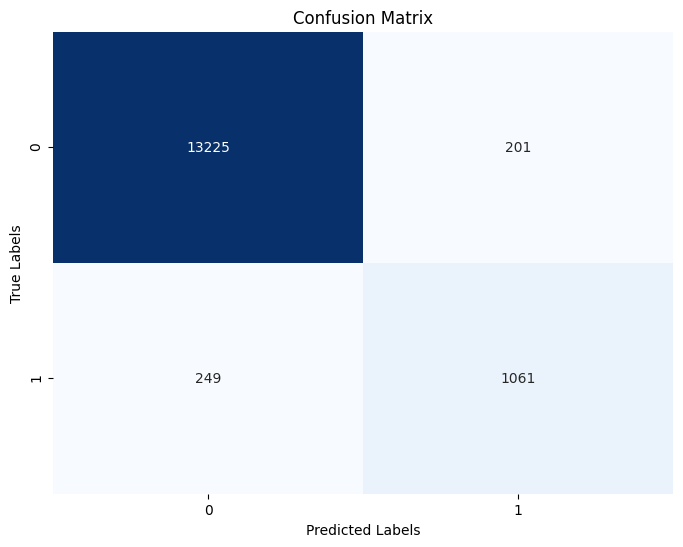

In [21]:


from sklearn.metrics import f1_score
f1=f1_score(y_ture, y_pred_classes)
print(f"Test f1_score : {f1 * 100:.2f}%")

# Compute the confusion matrix
confusion = confusion_matrix(y_ture, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [22]:
y_pred_classes

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
y_test

,fake,real
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
14731,0,1
14732,1,0
14733,1,0
14734,1,0


# part 2

In [24]:
data_train_2 = pd.read_csv("C:\\Users\\aa\\Desktop\\project\\models  to find the best k for MFCC\\100\\data set\\spliting data\\train part_2.csv")
data_train_2 = data_train.sample(frac=1).reset_index(drop=True)
# data_train['label']=label_encoder.transform(data_train['label'])

In [25]:

data_train=pd.concat([data_train, data_train_2], axis=0)


In [26]:
data_train

,label,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,fake,-306.921326,53.293018,-20.000957,-18.536442,-39.781185,-41.742313,-11.678054,-15.916217,-21.128649,...,14.356652,10.873713,5.455611,-0.690923,-7.137050,-11.879164,-15.684088,-16.689177,-15.551497,-11.957931
1,fake,-295.222626,15.905941,-11.051978,-8.489007,-32.817947,-36.271439,-32.141216,-17.880743,-7.306180,...,14.801456,11.219444,5.581073,-0.753719,-7.389214,-11.769518,-15.363281,-15.784241,-14.465268,-10.992316
2,fake,-333.773712,35.047989,-7.400196,1.719531,-29.585438,-40.182434,-33.450871,-16.010681,-5.215246,...,14.811807,10.991402,6.022015,0.249178,-6.143223,-10.911807,-14.934133,-16.364513,-15.320057,-12.252742
3,real,-292.607086,48.621441,-18.748705,-19.487453,-32.893837,-45.398151,-14.658494,-9.698881,-13.464665,...,11.309923,8.127817,4.246242,-0.639600,-6.185764,-9.911580,-13.201906,-14.391807,-13.149723,-10.924856
4,fake,-300.126740,52.865116,-24.902576,-16.426813,-34.236401,-36.210262,-19.713276,-15.977428,-22.446465,...,17.461840,13.359921,7.280792,0.421666,-6.751625,-12.065166,-16.352354,-18.116280,-17.034233,-13.332744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23573,fake,-314.068481,43.292950,-18.776388,-14.201493,-28.161467,-41.041889,-21.927954,-8.372314,-19.360592,...,16.146597,12.230557,6.865351,0.167860,-6.774581,-11.328199,-15.405516,-16.977911,-15.926724,-12.653993
23574,fake,-303.383850,42.742401,-22.652855,-16.521111,-29.629087,-33.384232,-24.700850,-15.055061,-17.961052,...,12.702654,9.304082,4.737759,-0.966709,-6.820433,-11.110938,-14.271523,-15.314397,-13.849821,-10.315882
23575,fake,-392.873077,46.548183,3.294556,-14.605451,-13.829702,-19.016327,-19.117445,0.777693,-14.502515,...,-3.898805,-6.722816,-11.983971,-14.527754,-15.071282,-12.102031,-7.136192,-0.459963,5.085217,10.290907
23576,fake,-333.333313,40.548470,-17.403648,-12.778193,-37.462559,-30.969006,-22.565348,-12.152289,-9.816529,...,14.369272,11.004692,6.376722,0.415340,-5.977124,-10.726922,-14.427612,-15.578466,-14.523456,-11.337918


In [27]:
X_train = data_train.drop(columns='label').values  # Features
y_train = data_train['label'].values  # Labels
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

y_train = pd.get_dummies(y_train)
model = Sequential()

# Add a 1D convolutional layer
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))

# Add a max-pooling layer
model.add(MaxPooling1D(pool_size=2))

# Flatten the output
model.add(Flatten())

# Add a fully connected layer
model.add(Dense(64, activation='relu'))

# Add the output layer with softmax activation
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 98, 64)            256       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 49, 64)           0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                200768    
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 201,154
Trainable params: 201,154
Non-trainable params: 0
________________________________________________

Epoch 1/100
737/737 [==============================] - 7s 9ms/step - loss: 0.2582 - accuracy: 0.9171 - val_loss: 0.1892 - val_accuracy: 0.9279
Epoch 2/100
737/737 [==============================] - 6s 9ms/step - loss: 0.1918 - accuracy: 0.9303 - val_loss: 0.1908 - val_accuracy: 0.9332
Epoch 3/100
737/737 [==============================] - 6s 9ms/step - loss: 0.1704 - accuracy: 0.9379 - val_loss: 0.1650 - val_accuracy: 0.9408
Epoch 4/100
737/737 [==============================] - 7s 9ms/step - loss: 0.1597 - accuracy: 0.9404 - val_loss: 0.1903 - val_accuracy: 0.9305
Epoch 5/100
737/737 [==============================] - 6s 9ms/step - loss: 0.1532 - accuracy: 0.9436 - val_loss: 0.1409 - val_accuracy: 0.9476
Epoch 6/100
737/737 [==============================] - 6s 9ms/step - loss: 0.1470 - accuracy: 0.9458 - val_loss: 0.1386 - val_accuracy: 0.9497
Epoch 7/100
737/737 [==============================] - 7s 9ms/step - loss: 0.1393 - accuracy: 0.9479 - val_loss: 0.1282 - val_accuracy: 0.9501

In [28]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

461/461 - 2s - loss: 0.1799 - accuracy: 0.9644 - 2s/epoch - 5ms/step
Test Accuracy: 96.44%


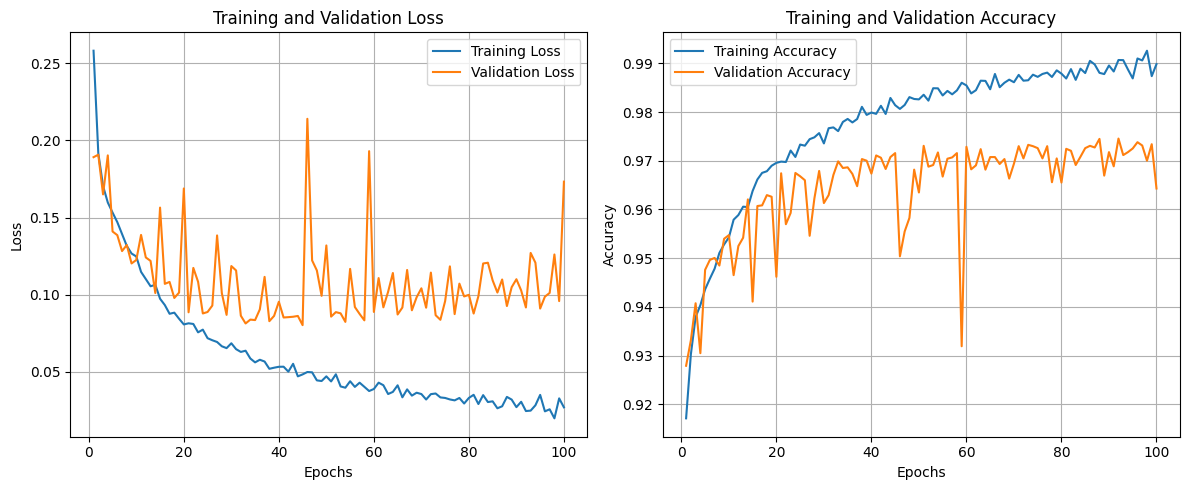

In [29]:
import matplotlib.pyplot as plt

# Get the training and validation loss and accuracy from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a range of values for the x-axis (epochs)
epochs = range(1, len(train_loss) + 1)

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 5))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


461/461 [==============================] - 1s 2ms/step
Test f1_score : 75.74%


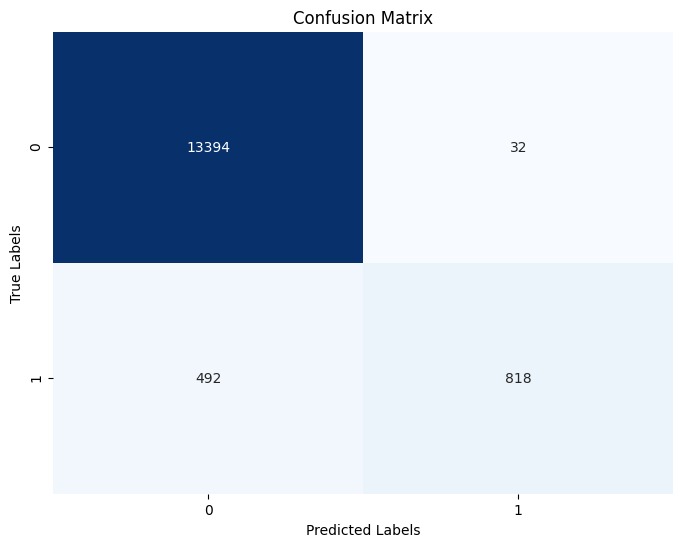

In [30]:
# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


# Compute the F1 score 

from sklearn.metrics import f1_score
f1=f1_score(y_ture, y_pred_classes)
print(f"Test f1_score : {f1 * 100:.2f}%")

# Compute the confusion matrix
confusion = confusion_matrix(y_ture, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# part 3

In [31]:
data_train_3 = pd.read_csv("C:\\Users\\aa\\Desktop\\project\\models  to find the best k for MFCC\\100\\data set\\spliting data\\train part_3.csv")
data_train_3= data_train.sample(frac=1).reset_index(drop=True)
data_train=pd.concat([data_train, data_train_3], axis=0)


In [32]:
data_train

,label,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,fake,-306.921326,53.293018,-20.000957,-18.536442,-39.781185,-41.742313,-11.678054,-15.916217,-21.128649,...,14.356652,10.873713,5.455611,-0.690923,-7.137050,-11.879164,-15.684088,-16.689177,-15.551497,-11.957931
1,fake,-295.222626,15.905941,-11.051978,-8.489007,-32.817947,-36.271439,-32.141216,-17.880743,-7.306180,...,14.801456,11.219444,5.581073,-0.753719,-7.389214,-11.769518,-15.363281,-15.784241,-14.465268,-10.992316
2,fake,-333.773712,35.047989,-7.400196,1.719531,-29.585438,-40.182434,-33.450871,-16.010681,-5.215246,...,14.811807,10.991402,6.022015,0.249178,-6.143223,-10.911807,-14.934133,-16.364513,-15.320057,-12.252742
3,real,-292.607086,48.621441,-18.748705,-19.487453,-32.893837,-45.398151,-14.658494,-9.698881,-13.464665,...,11.309923,8.127817,4.246242,-0.639600,-6.185764,-9.911580,-13.201906,-14.391807,-13.149723,-10.924856
4,fake,-300.126740,52.865116,-24.902576,-16.426813,-34.236401,-36.210262,-19.713276,-15.977428,-22.446465,...,17.461840,13.359921,7.280792,0.421666,-6.751625,-12.065166,-16.352354,-18.116280,-17.034233,-13.332744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47151,fake,-391.920593,37.927219,-20.164412,-5.390797,-17.988825,-17.629436,-14.698682,2.405411,-13.601247,...,-4.717626,-7.835462,-11.906781,-13.638227,-13.656473,-10.522465,-6.341648,0.020074,4.789239,9.416896
47152,fake,-311.766510,38.465809,-17.437349,-9.570361,-29.607656,-54.157520,-27.738161,-4.251506,-12.980382,...,17.809151,13.735417,7.314534,0.070143,-7.727372,-12.815071,-16.924496,-18.081995,-16.504471,-13.043764
47153,fake,-274.838745,51.887409,-20.443108,-14.551701,-28.337084,-46.816563,-29.107267,-16.233353,-26.713148,...,18.420149,13.704093,7.202646,-0.564181,-8.671869,-14.051483,-18.627642,-19.883202,-18.269554,-14.062105
47154,fake,-344.944244,52.312248,-23.446911,-31.244175,-39.303444,-34.109516,-30.093666,-9.328171,-9.613547,...,12.865312,9.410769,4.651656,-1.061886,-6.965909,-10.635599,-13.707223,-14.746631,-13.740751,-10.747921


In [33]:
X_train = data_train.drop(columns='label').values  # Features
y_train = data_train['label'].values  # Labels
y_train = pd.get_dummies(y_train)


X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
# Train the model



model = Sequential()

# Add a 1D convolutional layer
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))

# Add a max-pooling layer
model.add(MaxPooling1D(pool_size=2))

# Flatten the output
model.add(Flatten())

# Add a fully connected layer
model.add(Dense(64, activation='relu'))

# Add the output layer with softmax activation
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 98, 64)            256       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 49, 64)           0         
 1D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 3136)              0         
                                                                 
 dense_4 (Dense)             (None, 64)                200768    
                                                                 
 dense_5 (Dense)             (None, 2)                 130       
                                                                 
Total params: 201,154
Trainable params: 201,154
Non-trainable params: 0
________________________________________________

Epoch 1/100
1474/1474 [==============================] - 14s 9ms/step - loss: 0.2210 - accuracy: 0.9244 - val_loss: 0.1632 - val_accuracy: 0.9388
Epoch 2/100
1474/1474 [==============================] - 14s 10ms/step - loss: 0.1617 - accuracy: 0.9412 - val_loss: 0.1591 - val_accuracy: 0.9381
Epoch 3/100
1474/1474 [==============================] - 11s 8ms/step - loss: 0.1433 - accuracy: 0.9471 - val_loss: 0.1299 - val_accuracy: 0.9484
Epoch 4/100
1474/1474 [==============================] - 12s 8ms/step - loss: 0.1329 - accuracy: 0.9507 - val_loss: 0.1230 - val_accuracy: 0.9536
Epoch 5/100
1474/1474 [==============================] - 11s 8ms/step - loss: 0.1187 - accuracy: 0.9560 - val_loss: 0.1113 - val_accuracy: 0.9592
Epoch 6/100
1474/1474 [==============================] - 12s 8ms/step - loss: 0.1058 - accuracy: 0.9612 - val_loss: 0.1069 - val_accuracy: 0.9605
Epoch 7/100
1474/1474 [==============================] - 11s 8ms/step - loss: 0.0939 - accuracy: 0.9650 - val_loss: 0.0933 

In [34]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

461/461 - 2s - loss: 0.1388 - accuracy: 0.9764 - 2s/epoch - 4ms/step
Test Accuracy: 97.64%


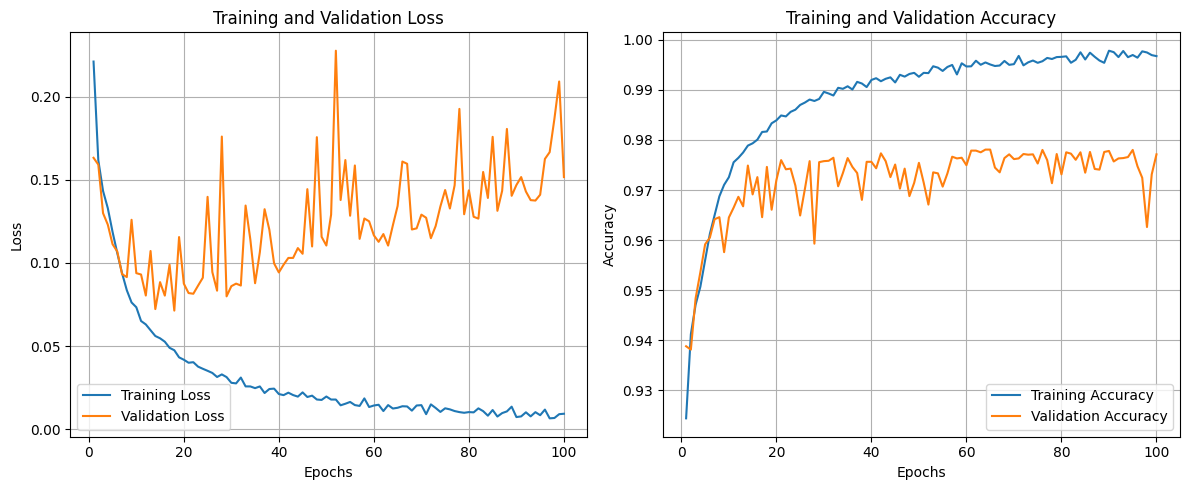

In [35]:
import matplotlib.pyplot as plt

# Get the training and validation loss and accuracy from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a range of values for the x-axis (epochs)
epochs = range(1, len(train_loss) + 1)

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 5))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


461/461 [==============================] - 1s 2ms/step
Test f1_score : 86.62%


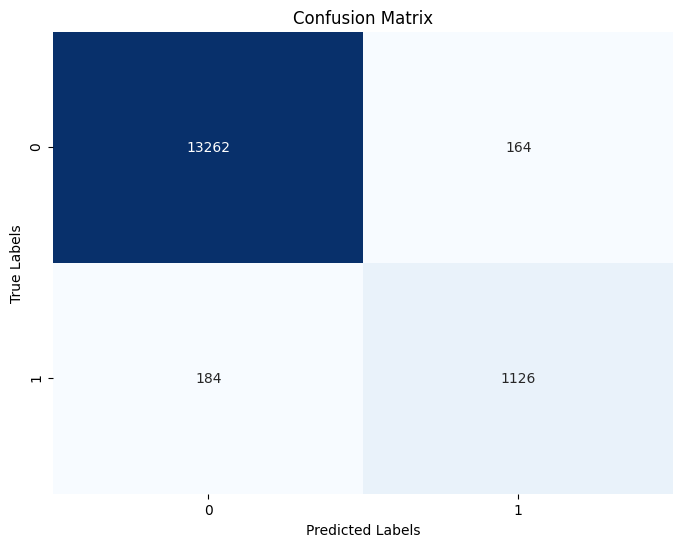

In [36]:
# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the F1 score 

from sklearn.metrics import f1_score
f1=f1_score(y_ture, y_pred_classes)
print(f"Test f1_score : {f1 * 100:.2f}%")

# Compute the confusion matrix
confusion = confusion_matrix(y_ture, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# part 4

In [37]:
data_train_4 = pd.read_csv("C:\\Users\\aa\\Desktop\\project\\models  to find the best k for MFCC\\100\\data set\\spliting data\\train part_4.csv")
data_train_4= data_train.sample(frac=1).reset_index(drop=True)
data_train=pd.concat([data_train, data_train_4], axis=0)

#data_train['label']=label_encoder.transform(data_train['label'])

In [38]:
X_train = data_train.drop(columns='label').values  # Features
y_train = data_train['label'].values  # Labels
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

y_train = pd.get_dummies(y_train)
# Train the model


model = Sequential()

# Add a 1D convolutional layer
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))

# Add a max-pooling layer
model.add(MaxPooling1D(pool_size=2))

# Flatten the output
model.add(Flatten())

# Add a fully connected layer
model.add(Dense(64, activation='relu'))

# Add the output layer with softmax activation
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 98, 64)            256       
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 49, 64)           0         
 1D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 3136)              0         
                                                                 
 dense_6 (Dense)             (None, 64)                200768    
                                                                 
 dense_7 (Dense)             (None, 2)                 130       
                                                                 
Total params: 201,154
Trainable params: 201,154
Non-trainable params: 0
________________________________________________

In [39]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

461/461 - 2s - loss: 0.1476 - accuracy: 0.9712 - 2s/epoch - 3ms/step
Test Accuracy: 97.12%


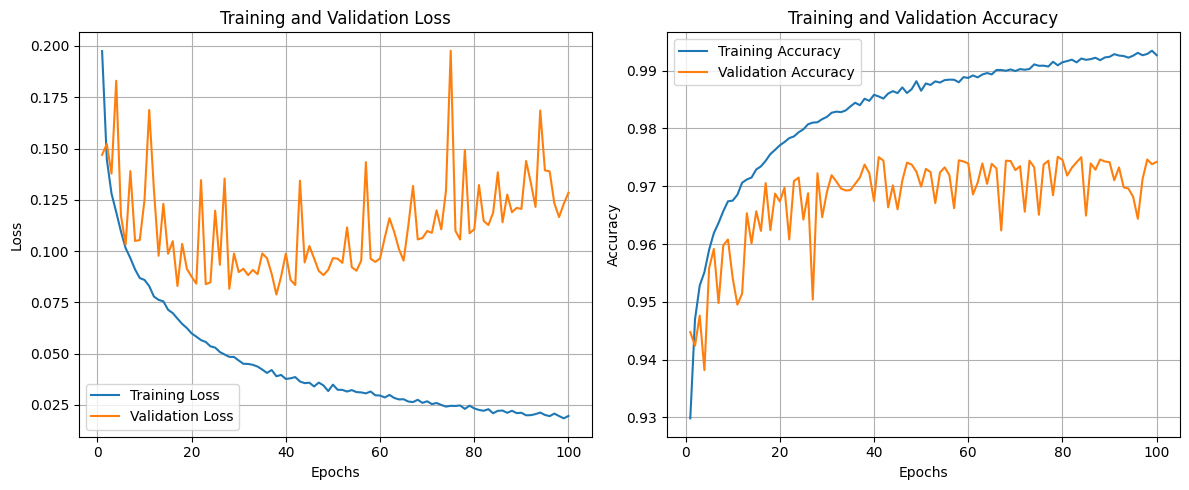

In [40]:
import matplotlib.pyplot as plt

# Get the training and validation loss and accuracy from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a range of values for the x-axis (epochs)
epochs = range(1, len(train_loss) + 1)

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 5))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


461/461 [==============================] - 1s 2ms/step
Test f1_score : 83.57%


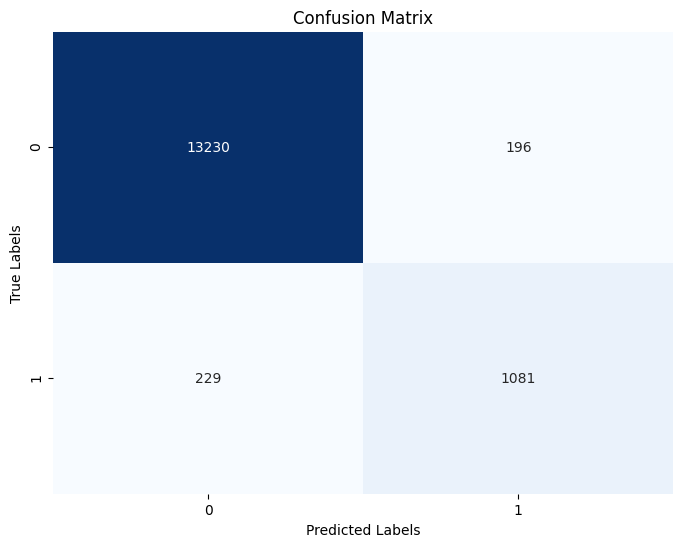

In [41]:
# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the F1 score 

from sklearn.metrics import f1_score
f1=f1_score(y_ture, y_pred_classes)
print(f"Test f1_score : {f1 * 100:.2f}%")

# Compute the confusion matrix
confusion = confusion_matrix(y_ture, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# part 5

In [42]:
data_train_5= pd.read_csv("C:\\Users\\aa\\Desktop\\project\\models  to find the best k for MFCC\\100\\data set\\spliting data\\train part_5.csv")
data_train_5= data_train.sample(frac=1).reset_index(drop=True)
#data_train['label']=label_encoder.transform(data_train['label'])
data_train=pd.concat([data_train, data_train_5], axis=0)

In [43]:
X_train = data_train.drop(columns='label').values  # Features
y_train = data_train['label'].values  # Labels
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
y_train = pd.get_dummies(y_train)
# Train the model

model = Sequential()

# Add a 1D convolutional layer
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))

# Add a max-pooling layer
model.add(MaxPooling1D(pool_size=2))

# Flatten the output
model.add(Flatten())

# Add a fully connected layer
model.add(Dense(64, activation='relu'))

# Add the output layer with softmax activation
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 98, 64)            256       
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 49, 64)           0         
 1D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 3136)              0         
                                                                 
 dense_8 (Dense)             (None, 64)                200768    
                                                                 
 dense_9 (Dense)             (None, 2)                 130       
                                                                 
Total params: 201,154
Trainable params: 201,154
Non-trainable params: 0
________________________________________________

In [44]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

461/461 - 1s - loss: 0.1989 - accuracy: 0.9773 - 1s/epoch - 3ms/step
Test Accuracy: 97.73%


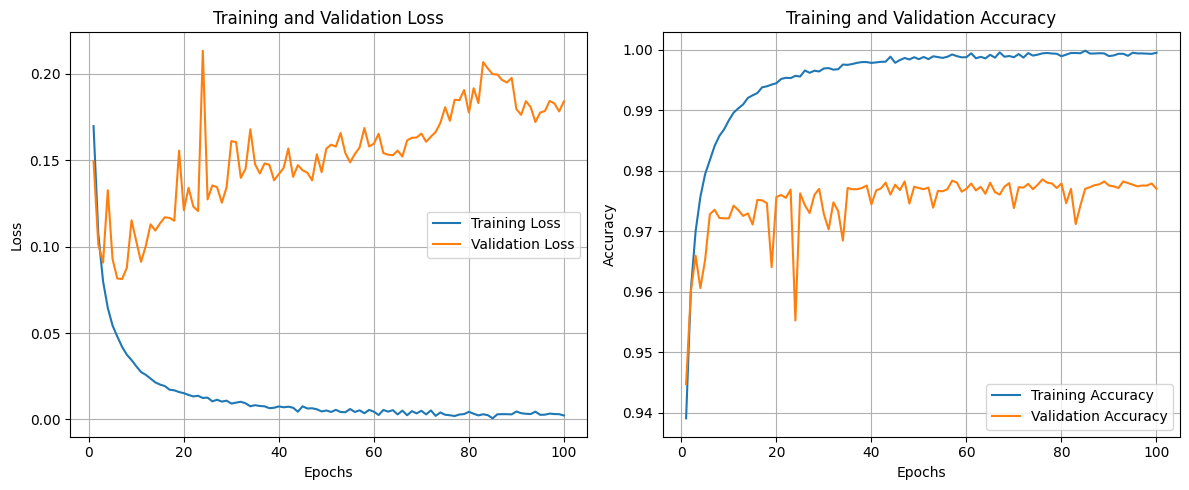

In [45]:
import matplotlib.pyplot as plt

# Get the training and validation loss and accuracy from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a range of values for the x-axis (epochs)
epochs = range(1, len(train_loss) + 1)

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 5))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


461/461 [==============================] - 1s 1ms/step
Test f1_score : 86.89%


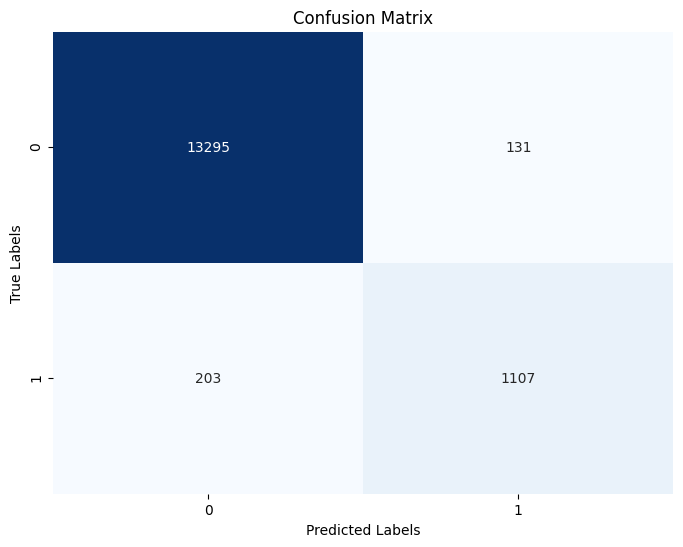

In [46]:
# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the F1 score 

from sklearn.metrics import f1_score
f1=f1_score(y_ture, y_pred_classes)
print(f"Test f1_score : {f1 * 100:.2f}%")

# Compute the confusion matrix
confusion = confusion_matrix(y_ture, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#################################################################

In [47]:
import joblib


In [48]:
joblib.dump(model, 'ljspeech_full_band_melgan.pkl')

INFO:tensorflow:Assets written to: ram://58109979-a4b5-4022-b389-27e125d42da4/assets


INFO:tensorflow:Assets written to: ram://58109979-a4b5-4022-b389-27e125d42da4/assets


['ljspeech_full_band_melgan.pkl']

In [49]:
#build the model
model.save('ljspeech_full_band_melgan.h5')
#to call the model
#New_Model = tf.keras.models.load_model('my_model.h5')